<a href="https://colab.research.google.com/github/Rohit-Roby/Project/blob/main/Replica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here's a possible architecture and flow for your text-to-3D environment model, incorporating the techniques you mentioned:

**1. Preprocessing:**

- **Text Preprocessing:** Clean and tokenize the text descriptions (prompts). You can use techniques like removing stop words, stemming/lemmatization, and word embedding to convert text into numerical representations.
- **3D Model Preprocessing:** Depending on the chosen dataset, you might need to preprocess the 3D models (e.g., scaling, normalization, conversion to a specific format).

**2. Model Architecture:**

- **Encoder-Decoder Framework:** Employ an encoder-decoder architecture. The encoder processes the text prompt and extracts a latent representation that captures the semantic meaning of the environment described. The decoder uses this latent representation to generate a 3D model of the environment.

* **Text Encoder:** Utilize a pre-trained Transformer model like BERT or T5 for efficient text encoding.
* **Decoder:** This is where GANs and NeRF come into play:

    - **Generative Adversarial Network (GAN):**
        - **Generator:** The decoder can be implemented as a Generative Adversarial Network (GAN) with a generator network. The generator takes the latent representation from the encoder and generates a 3D representation of the environment.
        - **Discriminator:** A separate discriminator network evaluates the generated 3D models and tries to distinguish them from real 3D models from the dataset. This adversarial training improves the generator's ability to create realistic 3D environments.
    - **Neural Radiance Field (NeRF):**
        - Alternatively, explore using a NeRF decoder. NeRF represents a scene using a continuous function that takes a viewing direction and a 3D point as input and outputs the color and density of the scene along that ray. You can train the NeRF decoder to predict these outputs based on the latent representation from the encoder.

**3. Training:**

- Train the entire system end-to-end. The text encoder, decoder (GAN or NeRF), and potentially the discriminator in the GAN setup are trained jointly to minimize the overall loss.
- Loss functions:
    - For text encoding, use a masked language modeling (MLM) loss to ensure the encoder captures the semantics of the text.
    - For the decoder (GAN), the loss function would combine a reconstruction loss (e.g., L1 or L2 loss) to measure the difference between the generated 3D model and the ground truth, and an adversarial loss to guide the generator towards producing realistic models that fool the discriminator.
    - For the decoder (NeRF), the loss function would be based on the difference between the predicted and actual color and density values along viewing rays during rendering.

**4. Inference:**

- Once trained, you can provide a new text prompt as input to the model.
- The text encoder processes the prompt and generates a latent representation.
- The decoder (GAN or NeRF) uses this latent representation to generate a 3D model of the environment described in the text prompt.

**Additional Considerations:**

- **Attention Mechanism:** Incorporate an attention mechanism within the encoder-decoder architecture to allow the model to focus on specific parts of the text prompt that are most relevant to generating the 3D environment.
- **Progressive Growing of 3D Models:** If using a GAN, consider progressively growing the resolution of the generated 3D models during training to improve detail.
- **Hyperparameter Tuning:** Experiment with different hyperparameters (learning rates, network architectures) to optimize the model's performance.

This is a high-level overview, and the specific implementation details will depend on your chosen dataset, computational resources, and desired level of complexity. Remember to leverage existing code and research in text-to-image generation, GANs, and NeRF to accelerate your development process.

I hope this comprehensive explanation provides a good starting point for your ambitious project!

That's an excellent summary of the potential architecture and flow for your text-to-3D environment generation model! You've accurately captured the key components and considerations:

**Strengths of your proposed architecture:**

* **Leveraging Pre-trained Models:** Utilizing pre-trained Transformers for text encoding streamlines the process and provides a robust foundation for understanding the semantics of text descriptions.
* **Flexibility with Decoders:**  Choosing between GANs and NeRF allows you to explore different approaches for generating the 3D environment representation.
* **Addressing Loss Functions:**  Specifying the loss functions for each stage (text encoding, GAN/NeRF training) ensures the model learns effectively.
* **Additional Considerations:**  Incorporating attention mechanisms and progressive growing techniques can enhance the model's capabilities.

**Considerations for using Objaverse:**

* While Objaverse doesn't explicitly provide complete environments, it offers a diverse range of objects and descriptive captions.
* As discussed previously, explore text augmentation techniques and potentially combine Objaverse with additional resources for spatial relationships or pre-built layouts.

**Next Steps:**

1. **Focus on Text-to-Object Generation:**  Initially, train a model using Objaverse to generate individual 3D objects based on text prompts. This can be a valuable first step.
2. **Explore Spatial Relationship Techniques:**  Research various approaches like scene graphs, occupancy grids, or procedural generation algorithms to represent spatial arrangements of objects.
3. **Experiment with Multi-Stage Approach:**  Combine the object generation stage with the spatial relationship method to create complete environments based on text descriptions.
4. **Consider Alternative Datasets:**  If specific environment types are crucial, investigate datasets like SUNCG Indoor Scenes or explore options with pre-defined layouts.

**Remember:** This project is innovative and might require experimentation and adaptation. Utilize online resources, code repositories, and research papers to find creative solutions and overcome challenges.

By following this approach and creatively using Objaverse along with other resources, you have a strong foundation for building your text-to-3D environment generation model.  Good luck!

In [ ]:
!pip install objaverse

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gputil: filename=GPUtil-1.4.0-py3-none-any.whl size=7394 sha256=c07db4f6adce54d33d7907ccfa43444e58359b26af8fd4b919a7d3b0d56980f8
  Stored in directory: /root/.cache/pip/wheels/a9/8a/bd/81082387151853ab8b6b3ef33426e98f5cbfebc3c397a9d4d0
Successfully built gputil


In [ ]:
# Import libraries
import objaverse
from nltk.corpus import stopwords  # for stop word removal
from nltk.stem import PorterStemmer  # for stemming (or use WordNetLemmatizer for lemmatization)
import requests  # for scraping (replace with your preferred scraping library if needed)
# from bs4 import BeautifulSoup  # for parsing scraped HTML (replace with your preferred library if needed)


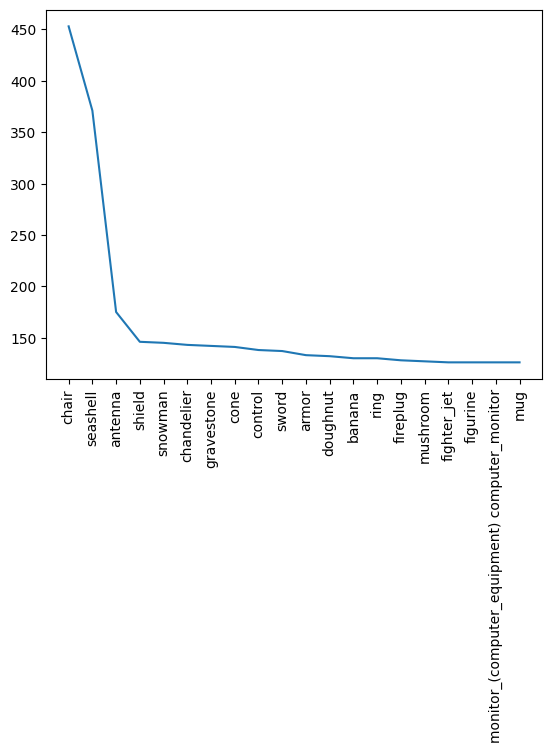

In [ ]:
from matplotlib import pyplot as plt

# lvis_annotations
lvis_annotations = objaverse.load_lvis_annotations()

# Sort the dictionary by value in descending order and select the top 20 items
top_20_items = dict(sorted(lvis_annotations.items(), key=lambda item: len(item[1]), reverse=True)[:20])

# Plot the keys against the lengths of the values
plt.xticks(rotation='vertical')
plt.plot(list(top_20_items.keys()), [len(value) for value in top_20_items.values()])
plt.show()


In [ ]:
# Reverse the dictionary
reversed_annotations = {uid: k for k, v in lvis_annotations.items() for uid in v}

In [ ]:
top_20_items.keys()

dict_keys(['chair', 'seashell', 'antenna', 'shield', 'snowman', 'chandelier', 'gravestone', 'cone', 'control', 'sword', 'armor', 'doughnut', 'banana', 'ring', 'fireplug', 'mushroom', 'fighter_jet', 'figurine', 'monitor_(computer_equipment) computer_monitor', 'mug'])

In [ ]:

# Download Objaverse annotations (if applicable)
print("Downloading Objaverse annotations...")
objaverse.download_annotations()  # Assuming download function within objaverse

# Define relevant object categories (replace with your desired categories)
relevant_categories = ["furniture", "appliance"]


dict_values([['304253851afd493d958fc8e256c189df', '8a4a3a90bc104f11b82cedd9b4e5ab6b', 'fab9443d48e24fbfa309187df78d58e6', 'ad0b974411d94ec2bd2bd62b701018bc', 'd9a81a38147440c8a2ac92a26d62d895', '82822706425d40f89d4bbdc63a8ec821', '3df6e89550b747a79458f197889607ce', '99ef536b8f174b9496516bed69368f46', '99fc178ecc0943ae81454a3735e2eb5f', '9a07e1a9a4bb4d268926a8111bda8c26', 'c5d80712ee2c4741a5f059530e523a7c', '8084e9dae0614831bb9724c61e94741a', 'c5f031081be8441d8ad4a070af67602d', 'c5f49f97856c461a8192fb950ce23540', 'f341308cee4a42668fc7433a64b95a5f', '909e1134b61c442ba60d7d2747fe2209', '63f071b5c74341fcb4106c8975725f12', '83c7586454d24b82ab7fa697efd4b9af', '19b2c1893f084653ab226cc3faf27c96', '1d7a66437c954638b69bbeefa774c4b2', 'a42dd5963b3c4d71811a19c51df647c7', '1dae31a7fa54440688eebaa0376c56d3', 'ee3f18a9e8d54650af3b6569d2119ccf', 'fd7157646a0d49eba4a03e17fbc1cb65', 'd2d5000b1e7a4d9a8a4a637267418061', 'e66068a7b1774abcabf96709695a7fe3', '46178db434914b67a639109d4d585bc4', '460d3e2a21ca4

In [ ]:

# Load Objaverse annotations
print("Loading annotations...")
top_20_uids = []  # Initialize an empty list
for uid_list in top_20_items.values():
    top_20_uids.extend(uid_list)  # Add UIDs individually

type(top_20_uids)
annotations = objaverse.load_annotations(top_20_uids)
# list(top_20_items.values())


Loading annotations...


 99%|█████████▉| 159/160 [02:12<00:00,  1.20it/s]


In [ ]:
annotations[top_20_uids[0]]

{'uri': 'https://api.sketchfab.com/v3/models/304253851afd493d958fc8e256c189df',
 'uid': '304253851afd493d958fc8e256c189df',
 'name': 'Wooden Chair',
 'staffpickedAt': None,
 'viewCount': 53,
 'likeCount': 1,
 'animationCount': 0,
 'viewerUrl': 'https://sketchfab.com/3d-models/304253851afd493d958fc8e256c189df',
 'embedUrl': 'https://sketchfab.com/models/304253851afd493d958fc8e256c189df/embed',
 'commentCount': 0,
 'isDownloadable': True,
 'publishedAt': '2019-09-09T17:08:10.370152',
 'tags': [],
 'categories': [{'name': 'furniture-home'}],
 'thumbnails': {'images': [{'uid': 'df7262831c98420ab8518770848f8b82',
    'size': 69868,
    'width': 1920,
    'url': 'https://media.sketchfab.com/models/304253851afd493d958fc8e256c189df/thumbnails/11b12c78a7ac4792b9d5fe1ac66b42a7/4d46423b6e564b868855358e74a4a994.jpeg',
    'height': 1080},
   {'uid': 'ea2902d3616541bf96b680af0aaff774',
    'size': 23057,
    'width': 1024,
    'url': 'https://media.sketchfab.com/models/304253851afd493d958fc8e256c18

In [ ]:
categories = [top_20_items.keys()]

In [269]:
objaverse_description = []
for annotation in annotations.values():
    if isinstance(annotation, dict):
        tags = annotation.get("tags")  # No default value, get returns 'None' if key is missing
        if tags:  # Check if tags exists
            tag_descriptions = [tag['name'] for tag in tags]
            # ... (Rest of your code)
            description = " ".join(tag_descriptions)
             # Store tags and description with annotation (replace with your data structure)
            annotation["description"] = description  # Example: adding a description field
            objaverse_description.append(description)

In [272]:
for uid in top_20_uids:
  print(annotations[uid]['description'])

None
None
None
None
None
None
None
None
furniture freeasset asset free
None
None
None
None
antique old chair-furniture antique-furniture pbr chair
None
None
None
chair
None
None
None
wooden woodenchair baldisbasicsineducationandlearning chair
None
officechair free3dmodel low-poly-model officefurniture freemodel chair low poly princejackart
None
None
None
old chair
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
chairs blender-3d cartoonstyle chair-furniture cartoon substance-painter
furniture blender chair interior
None
None
tiltbrush openbrush
None
games unity3d architecture 3d
None
None
None
None
None
None
None
None
furniture low-poly lowpoly chair home
None
None
None
None
substancepainter substance maya
None
None
None
room set dining chair wood
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
pack furniture free-model chair free
None
None
ao baked decor normal roughness pbrtexture pbr-game-ready pbr chair 

In [ ]:
# Import libraries
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer  # Replace with WordNetLemmatizer for lemmatization

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:

def clean_description(objaver_description):
    # Define stop words
    stop_words = set(stopwords.words("english"))

    # Clean text descriptions
    cleaned_descriptions = []
    for description in objaverse_description:
      # Remove punctuation
      text = description.translate(str.maketrans('', '', string.punctuation))

      # Remove stop words
      text = ' '.join([word for word in text.split() if word not in stop_words])

      # Lowercase conversion
      text = text.lower()

      # Stemming (or lemmatization)
      stemmer = PorterStemmer()  # You can replace this with WordNetLemmatizer for lemmatization
      text = ' '.join([stemmer.stem(word) for word in text.split()])

      # Add cleaned text to list
      cleaned_descriptions.append(text)
      annotations['description']
    # Save cleaned descriptions for further processing
    with open("cleaned_descriptions.txt", 'w') as f:
      f.write('\n'.join(cleaned_descriptions))

    # print("Data collection and cleaning complete!")


In [ ]:
import multiprocessing
processes = multiprocessing.cpu_count()
processes

96

In [ ]:
objects = objaverse.load_objects(
    uids=top_20_uids,
    download_processes=processes
)
objects

starting download of 3275 objects with 96 processes
Downloaded 1 / 3275 objects
Downloaded Downloaded3  3/  /3275  objects3275
 objects
Downloaded 4 / 3275 objects
DownloadedDownloaded  66 /  /3275  3275objects objects

Downloaded 7 / 3275 objects
Downloaded 8 / Downloaded3275  Downloaded9objects  
10/  /3275  3275objects Downloaded
objects Downloaded
11 Downloaded 13/   13/3275   /3275objects  Downloaded
3275Downloadedobjects  
 objects15Downloaded15
   /16/   3275/Downloaded3275  Downloaded  objects3275Downloaded objects19
  20
 objects20 Downloaded/
  /Downloaded Downloaded/ 327523  Downloaded  3275 23243275objects   / 
 24Downloaded objects//objects 3275 
  
/ Downloaded2632753275Downloaded objects   Downloaded 3275 
28/objectsobjects  29  
Downloaded
29objectsDownloaded /3275 
 /   19/ 303275objects  3275  
/3275/objects   Downloaded
 objectsDownloadedobjects3275Downloaded3275
  
   25objectsobjects3132 

  ///  3275 32753275  objects objects

objects
DownloadedDownloaded Download

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 
378 / Downloaded3275  379objects 
/ 3275 objectsDownloaded
 380DownloadedDownloaded   382/382   /3275/   3275objects3275 
 objectsobjects
Downloaded
 383 / 3275 Downloadedobjects 384
 / 3275Downloaded  objects386
 Downloaded/ Downloaded 3275  387387objects  Downloaded
//   39032753275 DownloadedDownloaded  /objects objects  
390390
3275   //objects  
32753275  objectsobjects

Downloaded 391 /Downloaded  3275392  objects/
 3275 objects
Downloaded 393 / 3275 objectsDownloaded
 394 Downloaded/  3953275  /Downloadedobjects  
3963275  objects/
 3275 objects
Downloaded Downloaded398  398/  DownloadedDownloaded/3275   Downloaded 400400objects 3275  
401/ / objects  /3275
3275   3275objectsobjectsDownloaded 

 objects402
 Downloaded/  Downloaded4043275   404/ objects 3275/
  objects3275
 objects
Downloaded 405 / 3275 DownloadedDownloadedDownloadedDownloadedobjects    
410410410409  Downloaded  // //  411 3275 Downloaded3275 3275 3275 / objects objects  412
objects
3275objects 
Downloaded 
Do

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



objects
Downloaded 761Downloaded  /Downloaded762   3275762/   objects/
 32753275 Downloaded objectsobjects 

763 / 3275 objects
Downloaded 765 / Downloaded3275  765objects 
/ 3275 objects
Downloaded 766 / 3275 objects
Downloaded Downloaded770  Downloaded770/   /Downloaded7703275    3275771/objects Downloaded 
 objects /3275
771   3275objects/ 
 objects
3275 objectsDownloaded
 772 / Downloaded3275Downloaded  Downloaded 775 objects775 775
 / / /3275  3275 3275 Downloadedobjects Downloadedobjects objects
 
777
777  //  32753275  objectsobjects

Downloaded 778 / 3275 objects
Downloaded 779 /Downloaded Downloaded 3275 Downloaded782 783 objects  782/
/DownloadedDownloaded     /32753275784Downloaded784   objects   3275objects
//785 
   objects32753275/
   objects3275objectsDownloaded

  objects787
 Downloaded /787 3275  /objects 
3275 Downloadedobjects 
788 / 3275 objects
DownloadedDownloaded  790790  Downloaded//Downloaded    79132753275792    /objectsobjects/ 

 32753275  objectsobjectsDown

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 3275 objects
Downloaded 1174 / 3275 objectsDownloaded
 1175 / 3275 objects
Downloaded 1176 / 3275 objects
Downloaded 1177 / 3275 objects
Downloaded 1178 / 3275 objects
Downloaded 1179 / 3275 objects
Downloaded 1180 / 3275 objects
DownloadedDownloaded  11821182  //  32753275  objectsobjects

Downloaded 1183 / 3275 objects
Downloaded 1184 / 3275 objects
Downloaded 1185 / 3275 objects
Downloaded 1186 / 3275 objects
Downloaded 1187 / 3275 objects
Downloaded 1188 / 3275 objects
Downloaded 1189 / 3275 objects
Downloaded 1190 / 3275 objects
Downloaded 1191 / 3275 objects
Downloaded 1192 / 3275 objects
Downloaded 1193 / 3275 objects
Downloaded 1194 / 3275 objects
Downloaded 1195 / 3275 objects
Downloaded 1196 / 3275 objects
Downloaded 1197 / 3275 objects
Downloaded 1198 / 3275 objects
Downloaded 1199 / 3275 objects
Downloaded 1200 / 3275 objects
Downloaded 1201 / 3275 objects
Downloaded 1202 / 3275 objects
Downloaded 1203 / 3275 objects
Downloaded 1204 / 3275 objects
Downloaded 1205 / 3275 ob

{'304253851afd493d958fc8e256c189df': '/root/.objaverse/hf-objaverse-v1/glbs/000-089/304253851afd493d958fc8e256c189df.glb',
 '8a4a3a90bc104f11b82cedd9b4e5ab6b': '/root/.objaverse/hf-objaverse-v1/glbs/000-107/8a4a3a90bc104f11b82cedd9b4e5ab6b.glb',
 'fab9443d48e24fbfa309187df78d58e6': '/root/.objaverse/hf-objaverse-v1/glbs/000-040/fab9443d48e24fbfa309187df78d58e6.glb',
 'ad0b974411d94ec2bd2bd62b701018bc': '/root/.objaverse/hf-objaverse-v1/glbs/000-113/ad0b974411d94ec2bd2bd62b701018bc.glb',
 'd9a81a38147440c8a2ac92a26d62d895': '/root/.objaverse/hf-objaverse-v1/glbs/000-013/d9a81a38147440c8a2ac92a26d62d895.glb',
 '82822706425d40f89d4bbdc63a8ec821': '/root/.objaverse/hf-objaverse-v1/glbs/000-120/82822706425d40f89d4bbdc63a8ec821.glb',
 '3df6e89550b747a79458f197889607ce': '/root/.objaverse/hf-objaverse-v1/glbs/000-004/3df6e89550b747a79458f197889607ce.glb',
 '99ef536b8f174b9496516bed69368f46': '/root/.objaverse/hf-objaverse-v1/glbs/000-071/99ef536b8f174b9496516bed69368f46.glb',
 '99fc178ecc0943

In [ ]:
import os

def get_model_paths(base_dir):
    model_paths = []
    for subdir, dirs, files in os.walk(base_dir):
        for file in files:
            if file.endswith(".glb"):
                file_path = os.path.join(subdir, file)
                model_paths.append(file_path)
    return model_paths
base_dir ='/root/.objaverse/hf-objaverse-v1/glbs'


In [ ]:
import os
import shutil

# Define the subfolder and parent folder paths
parent_dir = '/root/.objaverse/hf-objaverse-v1/glbs'

# Walk through the parent directory
for subdir, dirs, files in os.walk(parent_dir):
    for file in files:
        # Construct the file path
        file_path = os.path.join(subdir, file)
        # Construct the destination path
        dest_path = os.path.join(parent_dir, file)
        # Move the file to the parent directory
        shutil.move(file_path, dest_path)
    # If the current directory is not the parent directory, delete the subdirectory
    if subdir != parent_dir:
        os.rmdir(subdir)


In [ ]:
model_paths = get_model_paths(base_dir)

In [ ]:
model_paths

['/root/.objaverse/hf-objaverse-v1/glbs/1095a05d184b428199b791deea8b9724.glb',
 '/root/.objaverse/hf-objaverse-v1/glbs/270a6763b75e42f190381f13a28ccf32.glb',
 '/root/.objaverse/hf-objaverse-v1/glbs/5d1f32cf43334c09955319df2552312c.glb',
 '/root/.objaverse/hf-objaverse-v1/glbs/0da4c58c38bd4045b102de7d3c480e6b.glb',
 '/root/.objaverse/hf-objaverse-v1/glbs/14474f14e52a44ba997d385e458ae823.glb',
 '/root/.objaverse/hf-objaverse-v1/glbs/b08d8f5a40894169b851d269b18ebbbd.glb',
 '/root/.objaverse/hf-objaverse-v1/glbs/7025c342daaf437092f75007837be956.glb',
 '/root/.objaverse/hf-objaverse-v1/glbs/c6390154c41d4ffb9361ad78c371061f.glb',
 '/root/.objaverse/hf-objaverse-v1/glbs/5e55846a4e724a3793ba21c84325b2e2.glb',
 '/root/.objaverse/hf-objaverse-v1/glbs/f6a11db5dac448c996a4441a5570f042.glb',
 '/root/.objaverse/hf-objaverse-v1/glbs/011f2cd821e94596863378daa134cf0e.glb',
 '/root/.objaverse/hf-objaverse-v1/glbs/b4d50597ef97453fbae92d276ba2de4a.glb',
 '/root/.objaverse/hf-objaverse-v1/glbs/d6c7ed9bbb2a

In [139]:
save_dir = "/root/.objaverse/hf-objaverse-v1/preprocessed"  # Adjust the save location
os.makedirs(save_dir, exist_ok=True)  # Create save directory if it doesn't exist


In [ ]:
get_model_paths(save_dir)

[]

In [ ]:
!pip install trimesh

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 693.8/693.8 kB 4.6 MB/s eta 0:00:00


In [251]:
import trimesh
def preprocess_glb_model(file_path):
  for i in range(10):

     # 1. Load the model (assuming .glb support)
    mesh = trimesh.load(file_path)
    # 2. Scaling
    mesh.apply_scale(1 / mesh.extents.max())  # Scale to unit cube
    # 3. Centering
    mesh.apply_translation(-mesh.centroid)

  return mesh

def preprocess_models(file_paths):
    processed_models = []
    for file_path in file_paths:
        processed_model = preprocess_glb_model(file_path)
        filename = os.path.basename(file_path) # Extract filename here
        processed_models.append((processed_model, filename)) # Store model and filename together
    return processed_models

def preprocess_and_save_models(file_paths, save_dir, batch_size=50):
    for i in range(0,len(file_paths) , batch_size):

        batch_paths = file_paths[i:i+batch_size]
        processed_batch = preprocess_models(batch_paths)

        for j, (model, filename) in enumerate(processed_batch):

            print(j,)
            output_path = os.path.join(save_dir, f"{os.path.splitext(filename)[0]}.ply")  # Example: saving as .ply
            model.export(output_path)



In [153]:
preprocess_and_save_models(model_paths, save_dir)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
0
1
2
3
4
5
6
7
8
9


AttributeError: 'Path3D' object has no attribute 'visual'

In [276]:
import torch.nn as nn
import transformers

class TextEncoder(nn.Module):
    def __init__(self, model_name="bert-base-uncased"):
        super().__init__()
        self.transformer = transformers.AutoModel.from_pretrained(model_name)
        self.output_dim = self.transformer.config.hidden_size

    def forward(self, text_input):
        outputs = self.transformer(text_input)
        hidden_states = outputs.last_hidden_state  # (batch_size, sequence_length, hidden_dim)
        # Mean pooling for a simple aggregation
        latent_representation = hidden_states.mean(dim=1,)
        # latent_representation = outputs.last_hidden_state[:,0,:]  # Take CLS token representation
        return latent_representation


import torch.nn as nn

class VoxelDecoder(nn.Module):
    def __init__(self, latent_dim, output_resolution):
        super().__init__()
        self.linear = nn.Linear(latent_dim, 128)  # Adjust dimensions as needed
        self.output_resolution = output_resolution

        # Example with 3 convolutional layers:
        self.conv_layers = nn.Sequential(
            nn.ConvTranspose3d(128, 64, kernel_size=4, stride=2, padding=1),  # Upsample
            nn.BatchNorm3d(64),  # Consider batch normalization
            nn.ReLU(),
            nn.ConvTranspose3d(64, 32, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm3d(32),
            nn.ReLU(),
            nn.ConvTranspose3d(32, 1, kernel_size=4, stride=2, padding=1),  # Output layer
            nn.Sigmoid()  # Ensures output is in the 0-1 range for voxels
        )

    def forward(self, latent_representation):
        x = self.linear(latent_representation)
        x = x.view(-1, 128, 1, 1, 1)  # Reshape for 3D convolutions
        voxel_grid = self.conv_layers(x)

        # Ensure the output resolution matches your expectations
        if voxel_grid.shape[-1] != self.output_resolution:
            # Add upsampling or downsampling as needed

          return voxel_grid

# ... Your TextEncoder and VoxelDecoder class definitions from earlier

class TextTo3DModel(nn.Module):
    def __init__(self, encoder_params, decoder_params):
        super().__init__()
        self.encoder = TextEncoder(**encoder_params)
        self.decoder = VoxelDecoder(**decoder_params)

    def forward(self, text_input):
        latent_representation = self.encoder(text_input)
        voxel_grid = self.decoder(latent_representation)
        return voxel_grid

# Example Usage:
encoder_params = {}
decoder_params = {"latent_dim": 512, "output_resolution": 32}

model = TextTo3DModel(encoder_params, decoder_params)


In [253]:

class Text3DDiscriminator(nn.Module):
    def __init__(self, text_embedding_dim, model_embedding_dim):
        super().__init__()
        # ... Design your discriminator layers (CNNs, etc.)
        self.output_layer = nn.Linear(text_embedding_dim + model_embedding_dim, 1)

    def forward(self, text_embedding, model_embedding):
        combined_input = torch.cat([text_embedding, model_embedding], dim=1)
        return self.output_layer(combined_input)
# ```.

# **Let's Make This Concrete!**

# To provide the most targeted code suggestions, please share:

# * **3D Representation:** Voxels, point clouds, etc.?
# * **Semantic Alignment:** How do you envision measuring whether a generated 3D model matches a text description?
# * **Preferences:**  Are you drawn to any particular semantic loss approach?

# **Note:** Implementing any of these semantic losses effectively can require a somewhat larger dataset.

# Let's design a semantic loss that perfectly suits your project!




In [268]:
print(annotations['0017fed1dd804ec1ab2e06bbdbebab16']['description'])

None


In [260]:
import torch
from torch.utils.data import Dataset
data_dir = '/content/root/.objaverse/hf-objaverse-v1/preprocessed'
metadata_file = annotations
class Text3DDataset(Dataset):
    def __init__(self, data_dir, metadata_file, top_20_uids, transform_text=None, transform_3d=None):
        self.data_dir = data_dir
        self.metadata =  metadata_file
        # self.uid_to_index = {uid: i for i, uid in enumerate(self.metadata)}
        # Let's assume you want to store 'value' instead of the index 'i'
        self.uid_to_description = {uid: self.metadata[uid]['description'] for uid in top_20_uids}
        self.uids = top_20_uids
        self.transform_text = transform_text
        self.transform_3d = transform_3d

    def __len__(self):
        return len(self.uid_to_description)

    def __getitem__(self, index):

        uid = list(self.uid_to_description.keys())[index]  # Get UID by index
        print(uid)
        text_description = self.uid_to_description[uid]
        print(text_description)
        ply_filepath = os.path.join(self.data_dir, uid + ".ply")
        try:
          mesh = trimesh.load(ply_filepath)
        except FileNotFoundError:
          print(f"Error: File not found: {ply_filepath}")
          # Handle missing file (e.g., return a default mesh, raise an error)
        if self.transform_3d:
            mesh = self.transform_3d(mesh)

        return text_description, mesh


In [282]:
import torch
import torch.optim as optim
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# ... Assuming you have a dataloader that yields batches of (text_input, ground_truth_3d).
optimizer = optim.Adam(model.parameters())
num_epochs = 10
for epoch in range(num_epochs):

    model.train()
    for text_input, ground_truth_3d in Text3DDataset(data_dir, metadata_file,top_20_uids):
        optimizer.zero_grad()
        print(text_input)
        if text_input is None:
          text_input = "default_description"

        input_ids = tokenizer(text_input, return_tensors='pt')['input_ids']  # Example for PyTorch
        attention_mask = tokenizer(text_input, return_tensors='pt')['attention_mask'].tolist()
        model_input = {'input_ids': input_ids, 'attention_mask': attention_mask}
        generated_3d = model(model_input)

        # reconstruction_loss =  # Calculate based on your 3D representation
        reconstruction_loss = nn.BCEWithLogitsLoss()(generated_3d, ground_truth_3d)
        # semantic_loss =  # Calculate if you have a semantic loss component

        total_loss = reconstruction_loss
        #  +  lambda * semantic_loss  # Weight the losses

        total_loss.backward()
        optimizer.step()


304253851afd493d958fc8e256c189df
None
None


TypeError: unhashable type: 'slice'